<a href="https://colab.research.google.com/github/Kyoungjinny/AI_PredictionModel/blob/predict/RandomForestRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
from google.colab import files
uploaded = files.upload()
'''

'\nfrom google.colab import files\nuploaded = files.upload()\n'

In [0]:
import pandas as pd
import numpy as np

In [0]:
#import io
#data = pd.read_csv(io.BytesIO(uploaded['data2005_2019.csv']))

In [0]:
data = pd.read_csv('data2005_2019.csv')

In [5]:
data.columns

Index(['Unnamed: 0', '10분 최다 강수량(mm)', '1시간 최다강수량(mm)', 'break_summer',
       'break_winter', 'cloud', 'cloud_w', 'date_fri', 'date_mon', 'date_sat',
       'date_sun', 'date_thur', 'date_tue', 'date_wed', 'fall', 'humid',
       'humid_w', 'm_free', 'm_paid', 'm_total', 'rain', 'spring', 'summer',
       'temp', 'temp_w', 'tp_adult', 'tp_child', 'tp_foreigner', 'tp_free',
       'tp_group', 'tp_paid', 'tp_teen', 'tp_total', 'when', 'wind', 'wind_w',
       'winter', 'zb_adult', 'zb_child', 'zb_foreigner', 'zb_free', 'zb_paid',
       'zb_teen', 'zb_total', '강수 계속시간(hr)', '일강수량(mm)'],
      dtype='object')

In [6]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
import seaborn as sns


mpl.rcParams['axes.unicode_minus'] = False

!apt -qq -y install fonts-nanum
mpl.font_manager._rebuild()

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
f = [f.name for f in fm.fontManager.ttflist]
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


[('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf'),
 ('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'),
 ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'),
 ('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf')]

In [0]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [0]:
data.rename(columns={'break_summer':'vacation_summer','break_winter':'vacation_winter'},inplace=True)

In [0]:
data.fillna(0,inplace=True)

# Monthly Visitors

In [10]:
data

10분 최다 강수량(mm)  1시간 최다강수량(mm)  ...  강수 계속시간(hr)  일강수량(mm)
0                0.0            0.0  ...         0.03       0.0
1                0.0            0.0  ...         0.00       0.0
2                0.0            0.0  ...         0.00       0.0
3                0.0            0.0  ...         0.00       0.0
4                0.0            0.0  ...         0.00       0.0
...              ...            ...  ...          ...       ...
4718             0.0            0.0  ...         0.00       0.0
4719             0.0            0.0  ...         2.25       0.0
4720             0.0            0.0  ...         0.42       0.0
4721             0.0            0.0  ...         6.83       0.7
4722             0.0            0.0  ...         3.33       1.0

[4723 rows x 45 columns]

In [0]:
data_monthly = data[['m_total','m_paid',	'm_free','temp', 'date_fri', 'date_thur',
       'date_wed', 'date_mon', 'date_sun', 'date_sat', 'date_tue', 'fall',
       'spring', 'summer', 'winter', 'vacation_summer', 'vacation_winter',
       'when', 'temp_w', 'rain', 'wind', 'humid', 'cloud', '강수 계속시간(hr)',
       '10분 최다 강수량(mm)', '1시간 최다강수량(mm)', '일강수량(mm)', 'cloud_w', 'temp_w',
       'humid_w', 'wind_w']]

In [12]:
'''
sns.pairplot(data_monthly)
plt.title("Pair Plot of Monthly Data of Year 2011-2019")
plt.show()
'''

'\nsns.pairplot(data_monthly)\nplt.title("Pair Plot of Monthly Data of Year 2011-2019")\nplt.show()\n'

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_

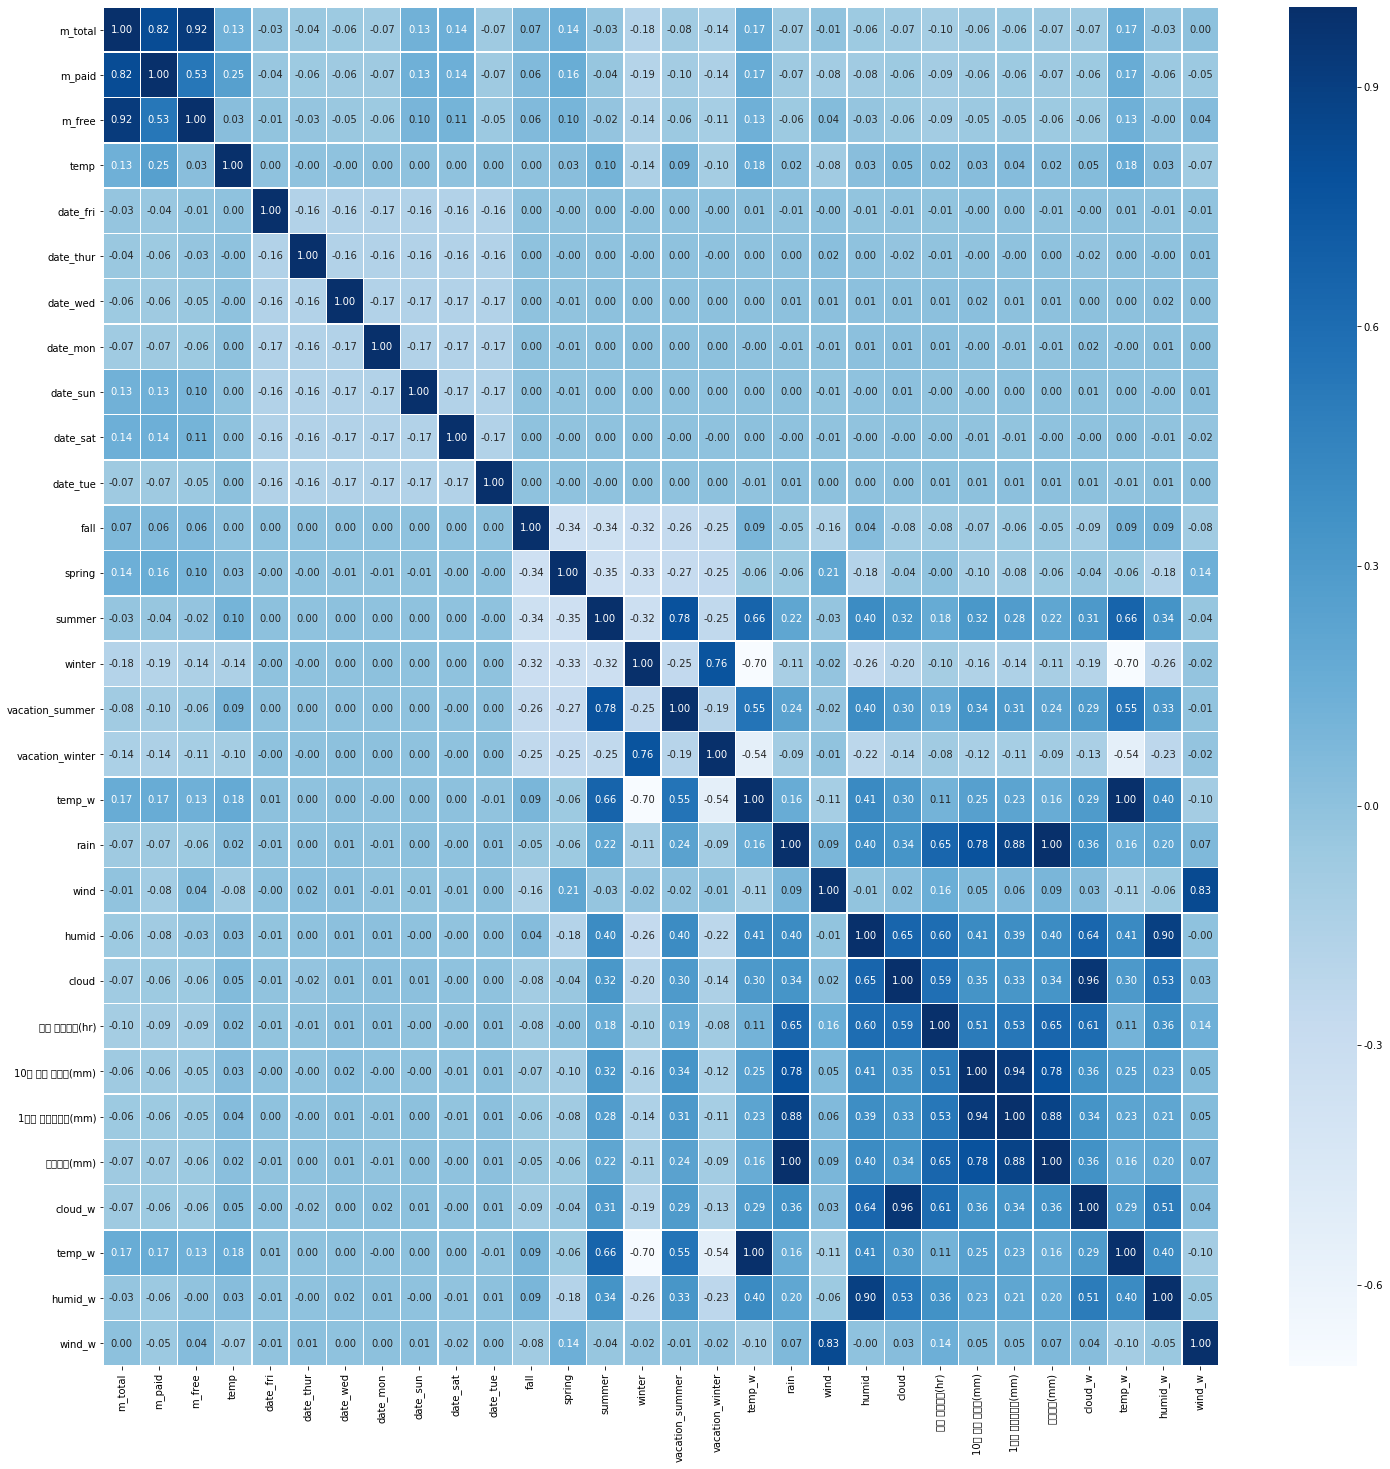

In [13]:
plt.figure(figsize=(25,25))
sns.heatmap(data = data_monthly.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [0]:
from sklearn.model_selection import train_test_split

y = data_monthly.pop('m_total')
X = data_monthly

X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)

In [15]:
data_monthly.shape

(4723, 30)

In [0]:
y_train = np.reshape(y_train.values,(-1,1))
X_train = np.reshape(X_train.values,(-1,1))
y_test = np.reshape(y_test.values,(-1,1))
X_test = np.reshape(X_test.values,(-1,1))

# Feature Engineering
일강수량, 구름양 머신러닝으로 예측

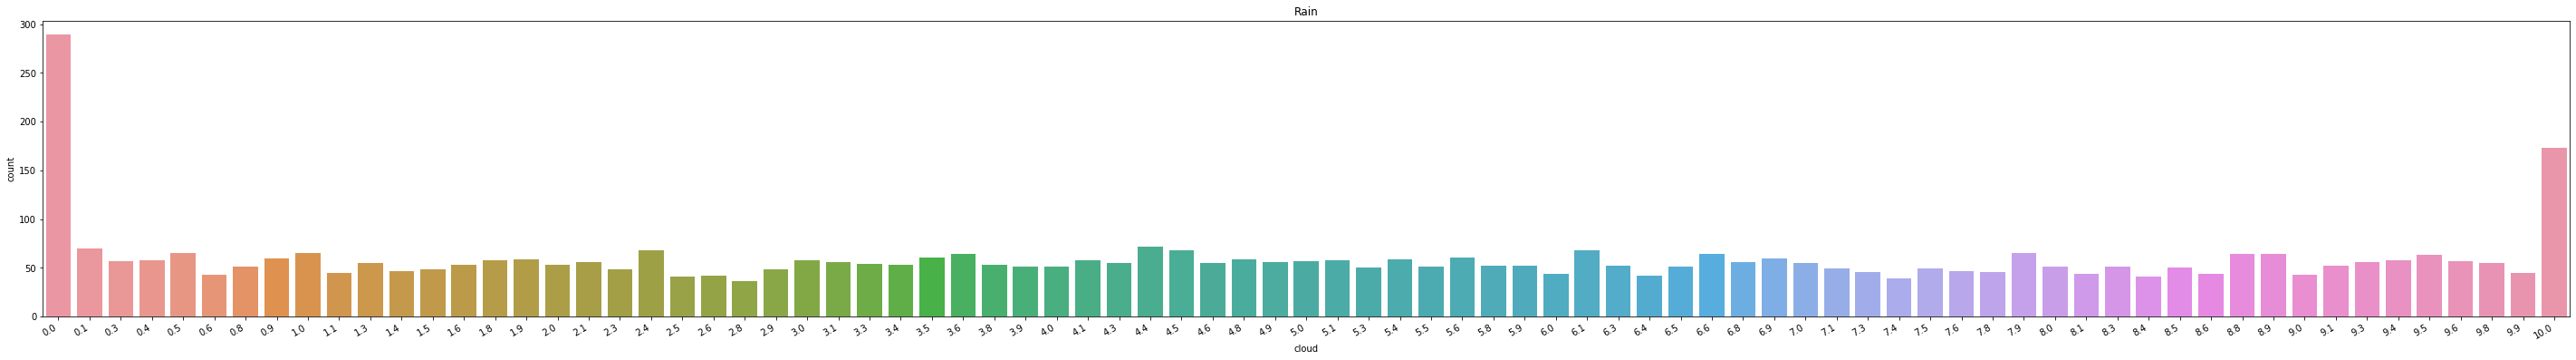

In [17]:
fig, ax1 = plt.subplots()
fig.set_size_inches(50,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="Rain")
sns.countplot(data=data_monthly, x='cloud', ax=ax1)

In [0]:
from sklearn.ensemble import RandomForestClassifier

def predict_weather(data):
    features = ['rain', 'cloud', '10분 최다 강수량(mm)', '1시간 최다강수량(mm)', '일강수량(mm)']

    for feature in features :
      dataRain0 = data.loc[data['{}'.format(feature)] == 0]
      dataRainNot0 = data.loc[data['{}'.format(feature)] != 0]

    # 강수량을 예측할 피처를 선택
      wCol = ["temp", "rain", "wind", "humid", "cloud", "강수 계속시간(hr)",
        "10분 최다 강수량(mm)", "1시간 최다강수량(mm)", "cloud_w", "temp_w",
        "humid_w", "wind_w","fall", "spring","summer", "winter"]

    # 강수량이 0이 아닌 데이터들의 타입을 스트링으로
      dataRainNot0['{}'.format(feature)] = dataRainNot0['{}'.format(feature)].astype("str")

    # 랜덤포레스트 분류기
      rfModel_rain = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 강수량을 학습
      rfModel_rain.fit(dataRainNot0[wCol], dataRainNot0['{}'.format(feature)])

    # 학습한 값을 바탕으로 강수량이 0으로 기록된 데이터의 강수량을 예측
      rain0Values = rfModel_rain.predict(X = dataRain0[wCol])

    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
      predictRain0 = dataRain0
      predictRainNot0 = dataRainNot0

    # 값이 0으로 기록된 강수량에 대해 예측한 값을 넣음
      predictRain0['{}'.format(feature)] = rain0Values

    # dataRainNot0 0이 아닌 강수량이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐줌
      data = predictRainNot0.append(predictRain0)

    # 강수량의 데이터 타입을 float으로 지정
      data['{}'.format(feature)] = data['{}'.format(feature)].astype("float")

      data.reset_index(inplace=True)
      data.drop('index', inplace=True, axis=1)

    return data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: Sett

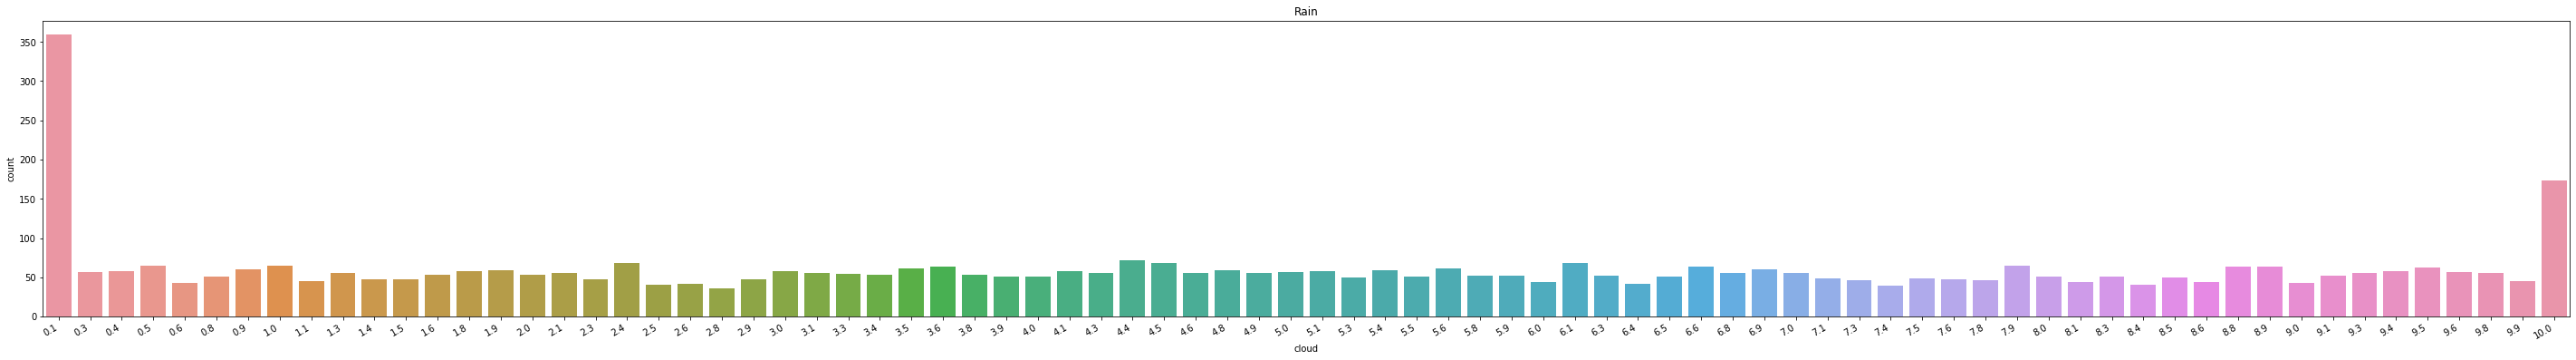

In [20]:
data_monthly = predict_weather(data_monthly)

fig, ax1 = plt.subplots()
fig.set_size_inches(50,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="Rain")
sns.countplot(data=data_monthly, x="cloud", ax=ax1)

# Feature Selection

In [0]:
categorical_feature_names = ['m_paid', 'm_free', 'date_fri', 'date_thur', 'date_wed',
       'date_mon', 'date_sun', 'date_sat', 'date_tue', 'fall', 'spring',
       'summer', 'winter', 'vacation_summer', 'vacation_winter']

for var in categorical_feature_names:
    data_monthly[var] = data_monthly[var].astype("category")

In [22]:
feature_names = ['m_paid', 'm_free', 'temp', 'date_fri', 'date_thur', 'date_wed',
       'date_mon', 'date_sun', 'date_sat', 'date_tue', 'fall', 'spring',
       'summer', 'winter', 'vacation_summer', 'vacation_winter', 'when',
       'temp', 'rain', 'wind', 'humid', 'cloud', '강수 계속시간(hr)',
       '10분 최다 강수량(mm)', '1시간 최다강수량(mm)', '일강수량(mm)', 'cloud_w', 'temp_w',
       'humid_w', 'wind_w']

feature_names

['m_paid',
 'm_free',
 'temp',
 'date_fri',
 'date_thur',
 'date_wed',
 'date_mon',
 'date_sun',
 'date_sat',
 'date_tue',
 'fall',
 'spring',
 'summer',
 'winter',
 'vacation_summer',
 'vacation_winter',
 'when',
 'temp',
 'rain',
 'wind',
 'humid',
 'cloud',
 '강수 계속시간(hr)',
 '10분 최다 강수량(mm)',
 '1시간 최다강수량(mm)',
 '일강수량(mm)',
 'cloud_w',
 'temp_w',
 'humid_w',
 'wind_w']

In [23]:
data_monthly = data_monthly[feature_names]

print(data_monthly.shape)

(4723, 31)


In [24]:
data_monthly.columns

Index(['m_paid', 'm_free', 'temp', 'date_fri', 'date_thur', 'date_wed',
       'date_mon', 'date_sun', 'date_sat', 'date_tue', 'fall', 'spring',
       'summer', 'winter', 'vacation_summer', 'vacation_winter', 'when',
       'temp', 'rain', 'wind', 'humid', 'cloud', '강수 계속시간(hr)',
       '10분 최다 강수량(mm)', '1시간 최다강수량(mm)', '일강수량(mm)', 'cloud_w', 'temp_w',
       'temp_w', 'humid_w', 'wind_w'],
      dtype='object')

# Train & Score

In [25]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)

    # 평균을 낸다.
    mean_difference = difference.mean()

    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)

    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [27]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [28]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

CPU times: user 1.36 s, sys: 245 ms, total: 1.61 s
Wall time: 6.4 s
Score= 4.29154


In [29]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [30]:
# 예측
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(945,)


array([6.266470e+03, 4.272570e+03, 1.587200e+02, 1.588800e+02,
       1.284300e+02, 1.300000e+00, 4.439000e+01, 5.260500e+02,
       1.397309e+04, 1.763433e+04])

[Text(0.5, 1.0, 'test')]

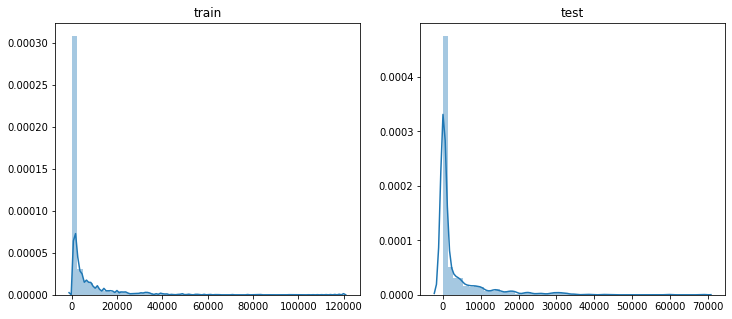

In [31]:
# 예측한 데이터를 시각화 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

# Zoo & Botanical Garden Visitors

In [32]:
data.columns

Index(['10분 최다 강수량(mm)', '1시간 최다강수량(mm)', 'vacation_summer', 'vacation_winter',
       'cloud', 'cloud_w', 'date_fri', 'date_mon', 'date_sat', 'date_sun',
       'date_thur', 'date_tue', 'date_wed', 'fall', 'humid', 'humid_w',
       'm_free', 'm_paid', 'm_total', 'rain', 'spring', 'summer', 'temp',
       'temp_w', 'tp_adult', 'tp_child', 'tp_foreigner', 'tp_free', 'tp_group',
       'tp_paid', 'tp_teen', 'tp_total', 'when', 'wind', 'wind_w', 'winter',
       'zb_adult', 'zb_child', 'zb_foreigner', 'zb_free', 'zb_paid', 'zb_teen',
       'zb_total', '강수 계속시간(hr)', '일강수량(mm)'],
      dtype='object')

In [0]:
data_zb = data[['10분 최다 강수량(mm)', '1시간 최다강수량(mm)', 'vacation_summer', 'vacation_winter',
       'cloud', 'cloud_w', 'date_fri', 'date_mon', 'date_sat', 'date_sun',
       'date_thur', 'date_tue', 'date_wed', 'fall', 'humid', 'humid_w',
       'rain', 'spring', 'summer', 'temp','temp_w','when', 'wind', 'wind_w', 'winter',
       'zb_adult', 'zb_child', 'zb_foreigner', 'zb_free', 'zb_paid', 'zb_teen',
       'zb_total', '강수 계속시간(hr)', '일강수량(mm)']]

In [34]:
data_zb

10분 최다 강수량(mm)  1시간 최다강수량(mm)  ...  강수 계속시간(hr)  일강수량(mm)
0                0.0            0.0  ...         0.03       0.0
1                0.0            0.0  ...         0.00       0.0
2                0.0            0.0  ...         0.00       0.0
3                0.0            0.0  ...         0.00       0.0
4                0.0            0.0  ...         0.00       0.0
...              ...            ...  ...          ...       ...
4718             0.0            0.0  ...         0.00       0.0
4719             0.0            0.0  ...         2.25       0.0
4720             0.0            0.0  ...         0.42       0.0
4721             0.0            0.0  ...         6.83       0.7
4722             0.0            0.0  ...         3.33       1.0

[4723 rows x 34 columns]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

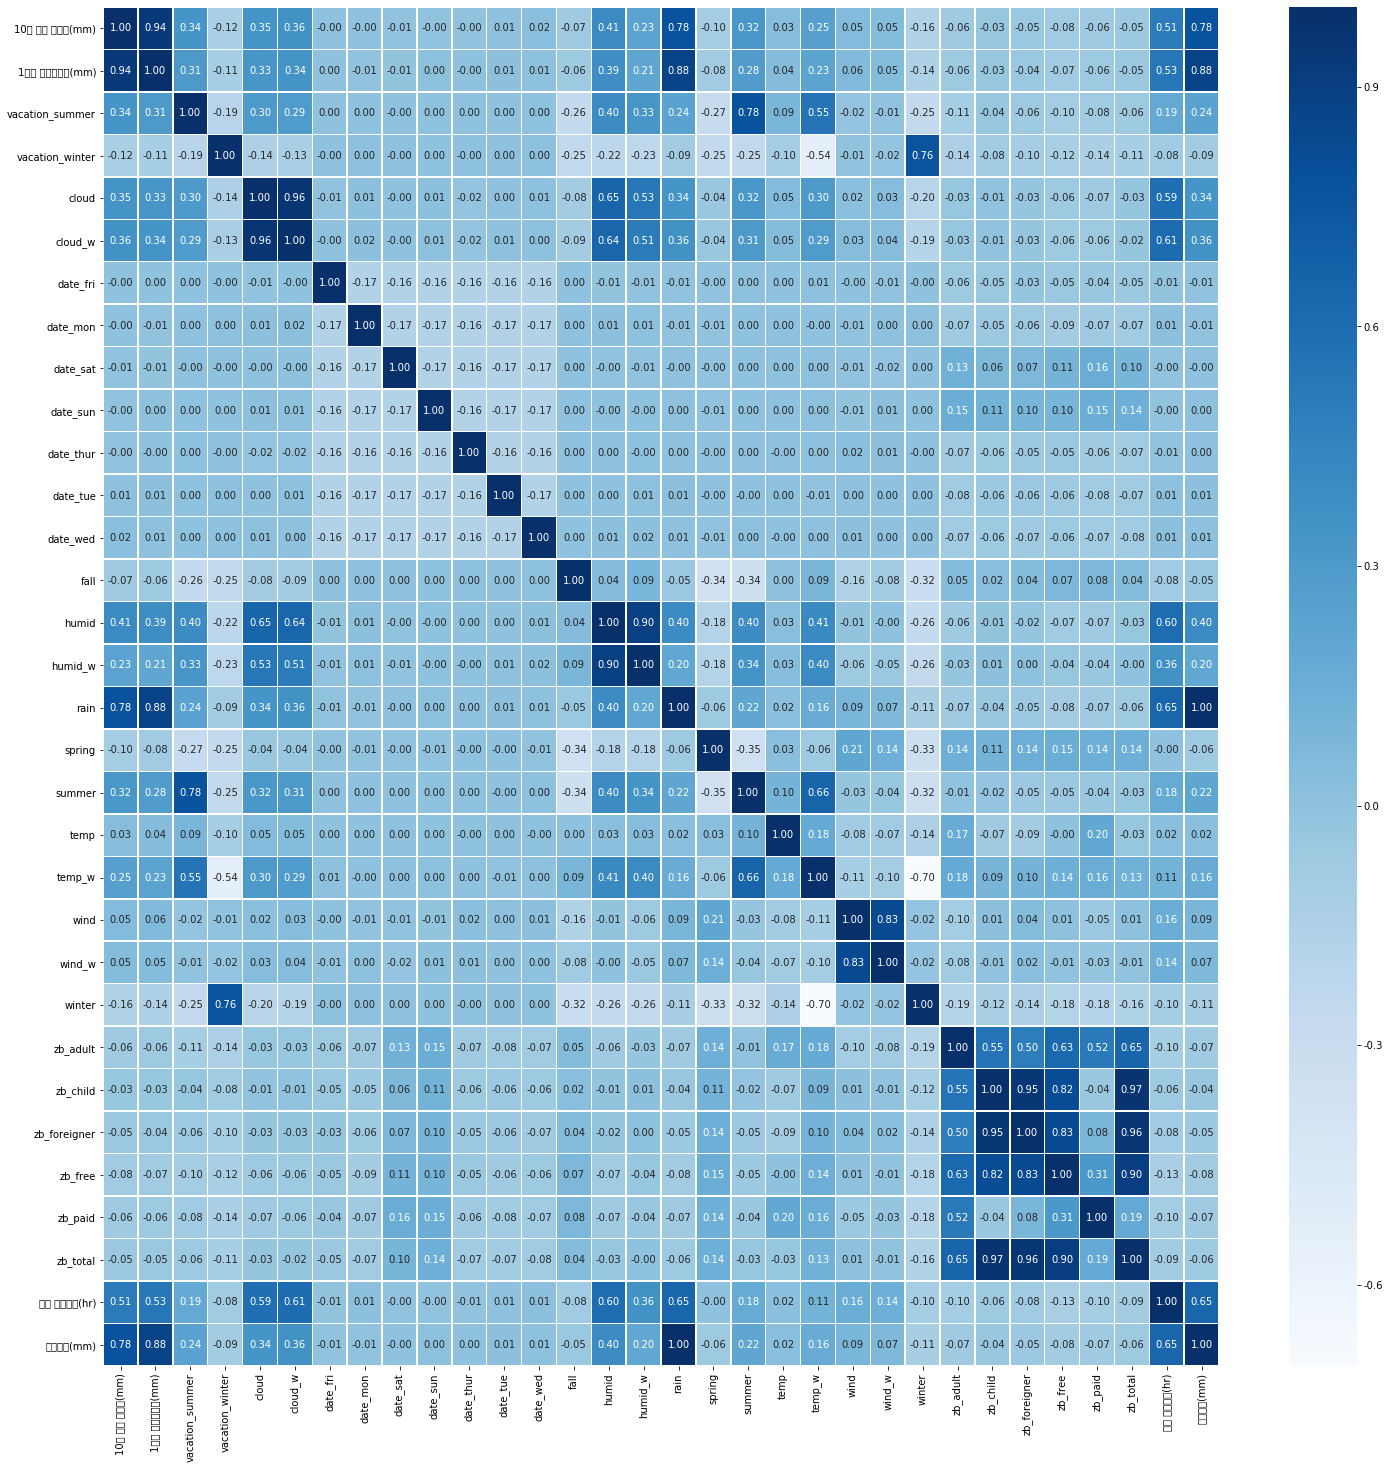

In [35]:
plt.figure(figsize=(25,25))
sns.heatmap(data = data_zb.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

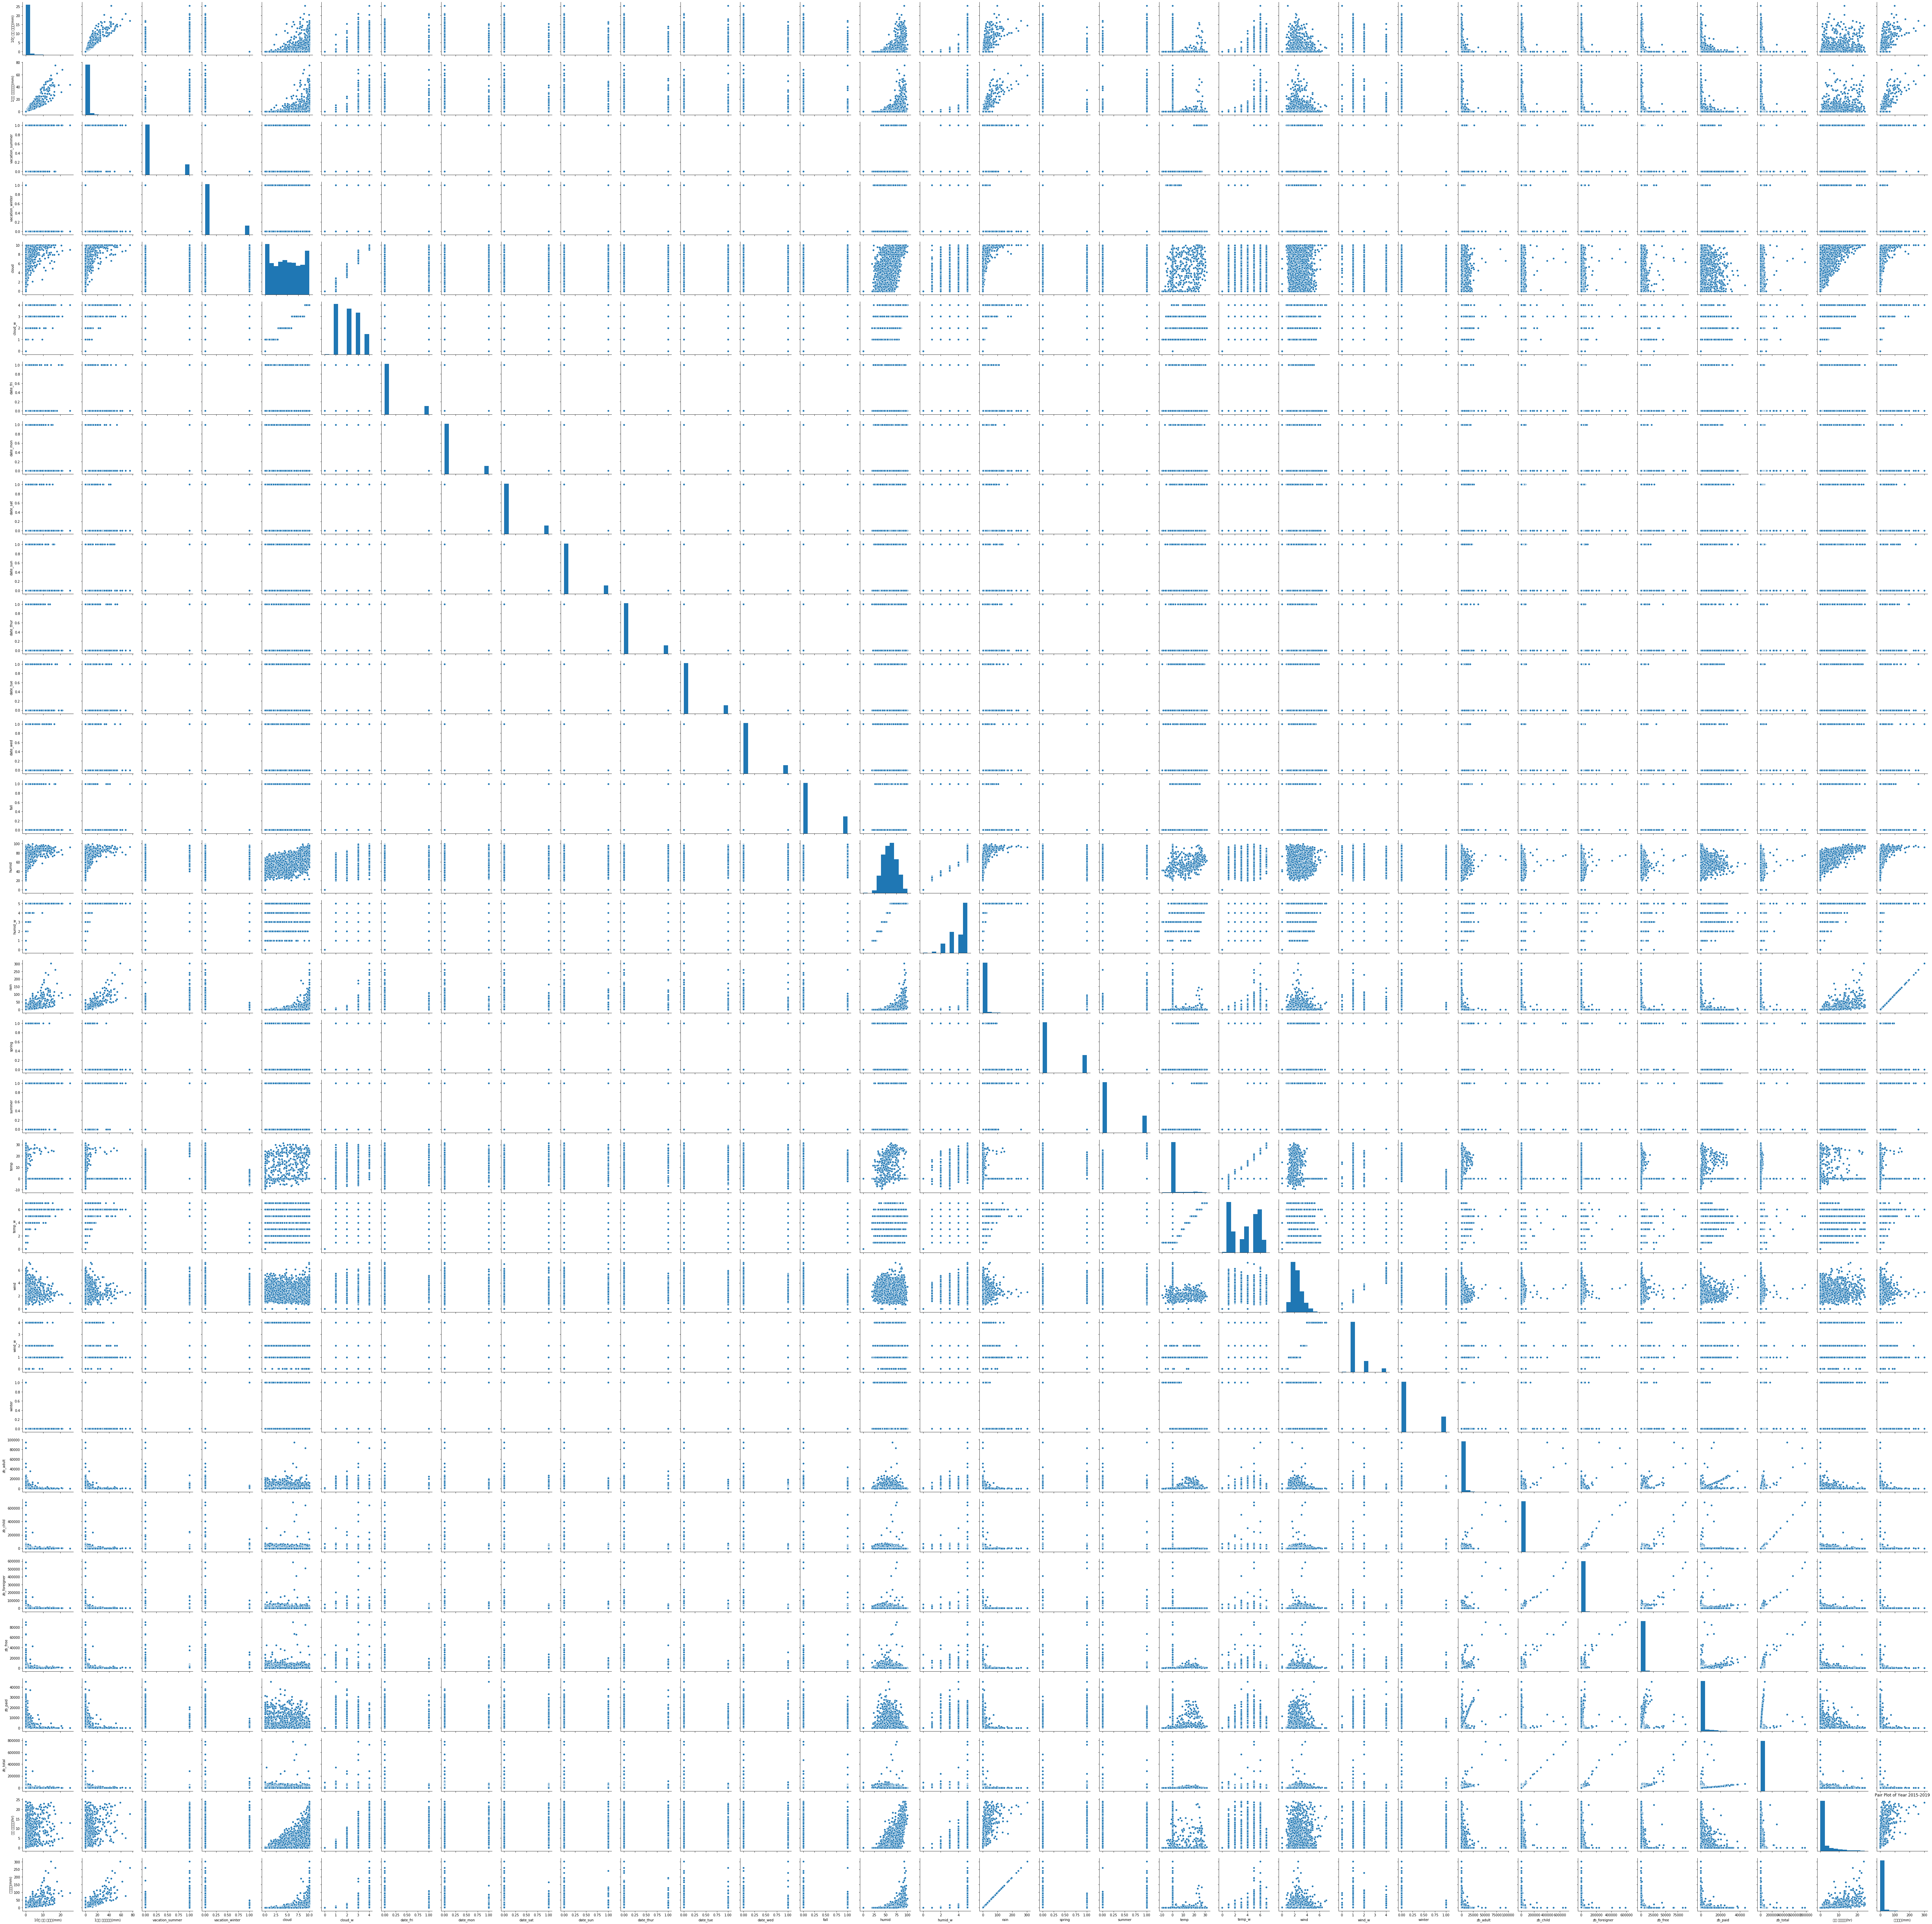

In [36]:
sns.pairplot(data_zb)
plt.title("Pair Plot of Year 2015-2019")
plt.show()

In [0]:
y = data_zb.pop('zb_total')
X = data_zb

X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)

y_train = np.reshape(y_train.values,(-1,1))
X_train = np.reshape(X_train.values,(-1,1))
y_test = np.reshape(y_test.values,(-1,1))
X_test = np.reshape(X_test.values,(-1,1))

In [38]:
data_zb = predict_weather(data_zb)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: Sett

In [39]:
model.fit(X_train, y_train)

# 예측
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


(945,)


array([23895.4 , 61805.25,  6459.53, 11493.74, 10140.09,  4061.3 ,
       36944.33,  3537.78,   680.91,  4224.6 ])

In [40]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

CPU times: user 1.37 s, sys: 171 ms, total: 1.54 s
Wall time: 5.24 s
Score= 1.79273


[Text(0.5, 1.0, 'test')]

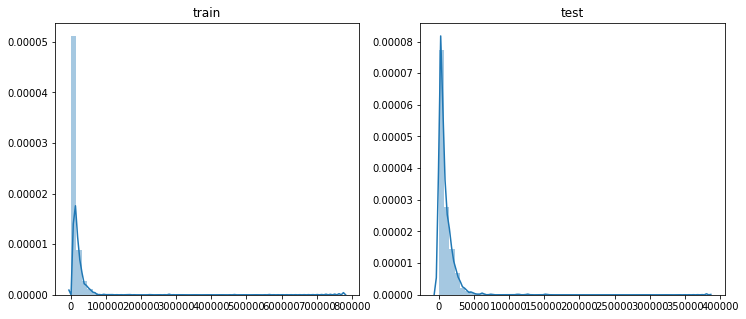

In [41]:
# 예측한 데이터를 시각화 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

# Theme Park Visitors

In [42]:
data.columns

Index(['10분 최다 강수량(mm)', '1시간 최다강수량(mm)', 'vacation_summer', 'vacation_winter',
       'cloud', 'cloud_w', 'date_fri', 'date_mon', 'date_sat', 'date_sun',
       'date_thur', 'date_tue', 'date_wed', 'fall', 'humid', 'humid_w',
       'm_free', 'm_paid', 'm_total', 'rain', 'spring', 'summer', 'temp',
       'temp_w', 'tp_adult', 'tp_child', 'tp_foreigner', 'tp_free', 'tp_group',
       'tp_paid', 'tp_teen', 'tp_total', 'when', 'wind', 'wind_w', 'winter',
       'zb_adult', 'zb_child', 'zb_foreigner', 'zb_free', 'zb_paid', 'zb_teen',
       'zb_total', '강수 계속시간(hr)', '일강수량(mm)'],
      dtype='object')

In [0]:
data_tp = data[['10분 최다 강수량(mm)', '1시간 최다강수량(mm)', 'vacation_summer', 'vacation_winter',
       'cloud', 'cloud_w', 'date_fri', 'date_mon', 'date_sat', 'date_sun',
       'date_thur', 'date_tue', 'date_wed', 'fall', 'humid', 'humid_w',
       'rain', 'spring', 'summer', 'temp', '강수 계속시간(hr)', '일강수량(mm)',
       'temp_w', 'tp_free', 'tp_group','tp_paid', 'tp_total', 'when', 'wind', 'wind_w', 'winter',]]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

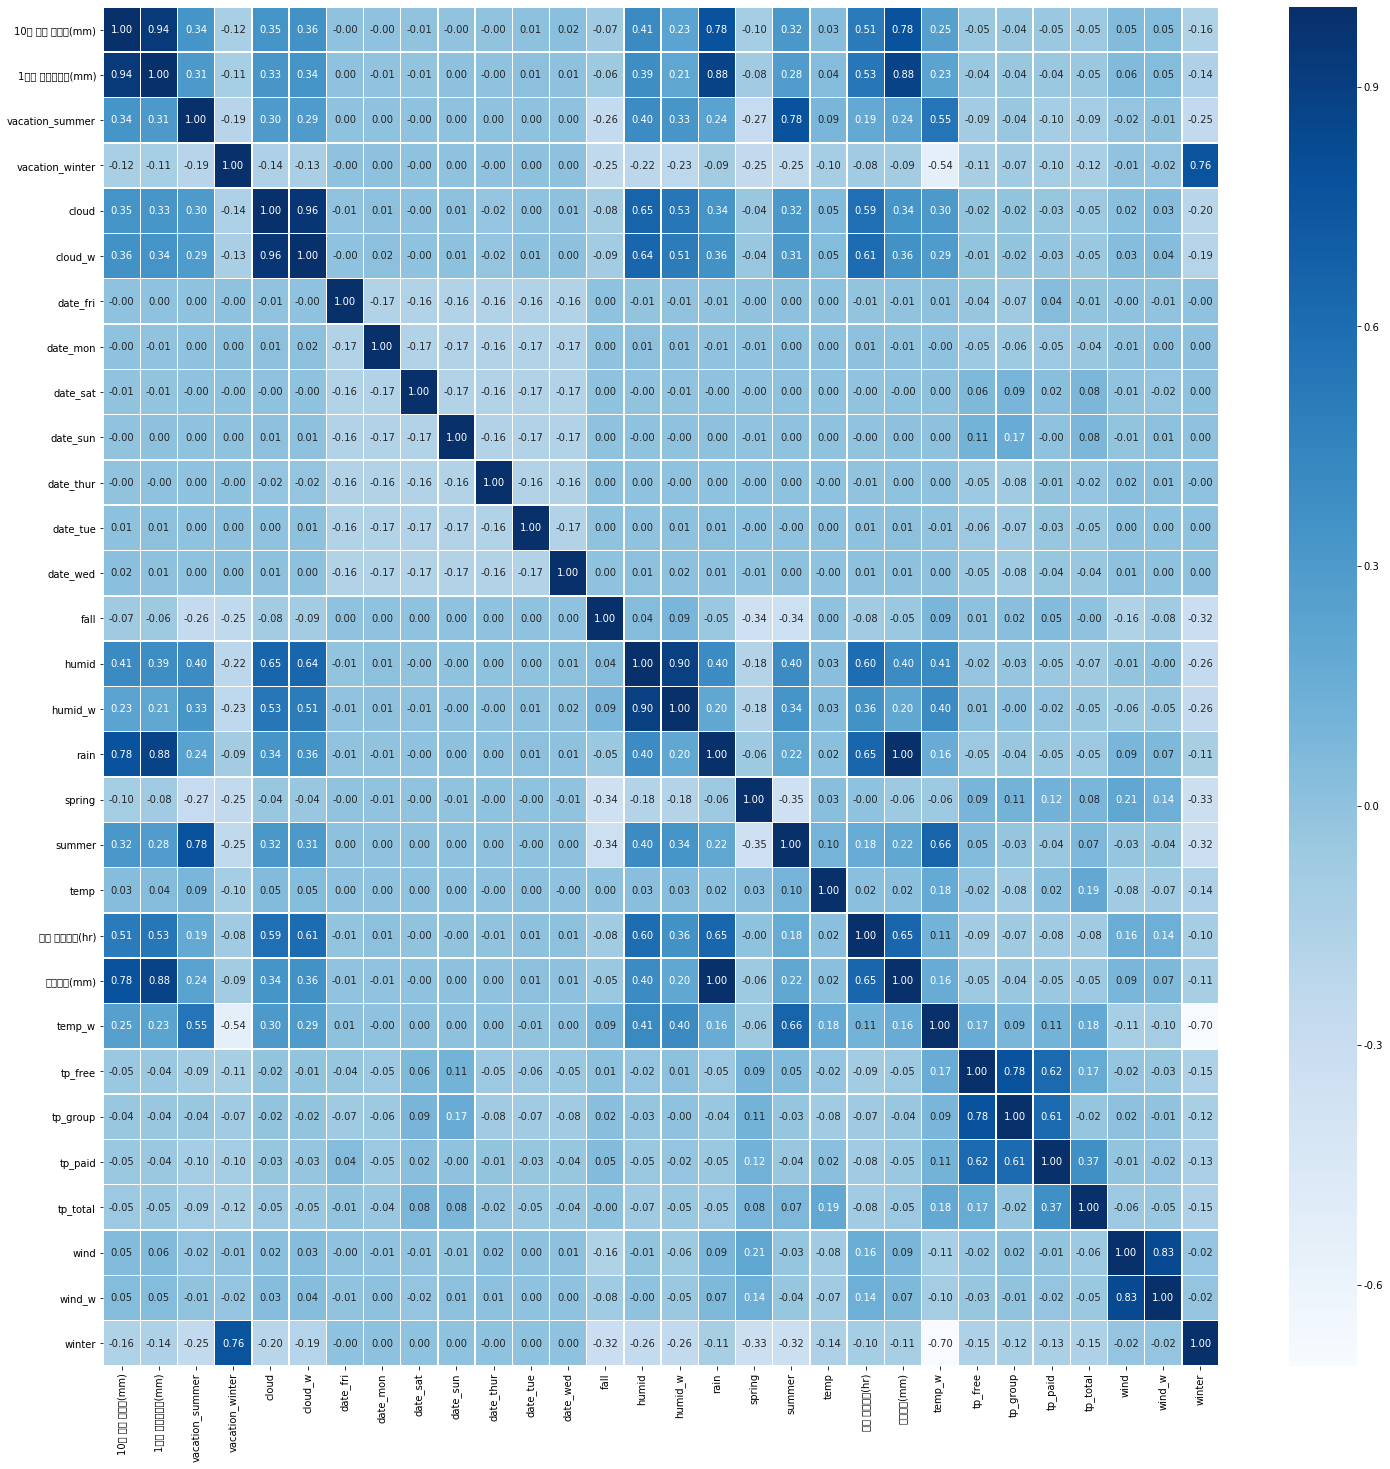

In [44]:
plt.figure(figsize=(25,25))
sns.heatmap(data = data_tp.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [0]:
y = data_tp.pop('tp_total')
X = data_tp

X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)

y_train = np.reshape(y_train.values,(-1,1))
X_train = np.reshape(X_train.values,(-1,1))
y_test = np.reshape(y_test.values,(-1,1))
X_test = np.reshape(X_test.values,(-1,1))

In [46]:
data_tp = predict_weather(data_tp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: Sett

In [47]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

CPU times: user 1.3 s, sys: 125 ms, total: 1.42 s
Wall time: 5.22 s
Score= 3.55303


[Text(0.5, 1.0, 'test')]

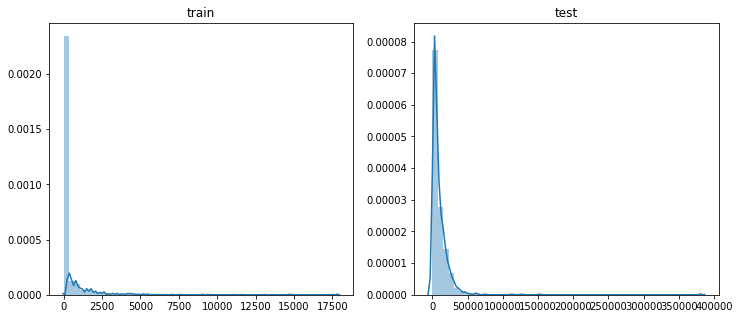

In [48]:
# 예측한 데이터를 시각화 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")